# 2.2 Data Transformation

## Importing Libraries

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [25]:
%%time
info_content_cleaned_df = pd.read_csv('../data/interim/Cleaned_Info_Content.csv', index_col='ucid')
info_userdata_cleaned_df = pd.read_csv('../data/interim/Cleaned_Info_UserData.csv', index_col='uuid')
log_problem_cleaned_df = pd.read_csv('../data/interim/Cleaned_Log_Problem.csv', index_col='upid')

Wall time: 16.7 s


## Parsing Date

In [27]:
info_userdata_cleaned_df['first_login_date_TW'].head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=    2019-01-24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=    2019-01-24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=    2019-01-24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=    2019-01-24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=    2019-01-24
Name: first_login_date_TW, dtype: object

In [28]:
log_problem_cleaned_df['timestamp_TW'].head()

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=    2018-09-28 20:00:00 UTC
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=    2018-09-28 10:15:00 UTC
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=    2018-09-05 20:00:00 UTC
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=    2018-09-14 16:30:00 UTC
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=    2018-09-13 16:00:00 UTC
Name: timestamp_TW, dtype: object

### Convert our date columns to datetime

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as "strftime directive", which you can find more information on at this link. The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

In [12]:
info_userdata_cleaned_df['first_login_date_TW'] = pd.to_datetime(info_userdata_cleaned_df['first_login_date_TW'], format='%Y-%m-%d')
info_userdata_transformed_df = info_userdata_cleaned_df.rename(columns = {'first_login_date_TW':'date_login'})

Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [16]:
# print the first few rows
info_userdata_transformed_df['date_login'].head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=   2019-01-24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=   2019-01-24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=   2019-01-24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=   2019-01-24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=   2019-01-24
Name: date_login, dtype: datetime64[ns]

In [14]:
log_problem_cleaned_df['timestamp_TW'] = pd.to_datetime(log_problem_cleaned_df['timestamp_TW'], format='%Y-%m-%d %H:%M:%S %Z')
log_problem_transformed_df = log_problem_cleaned_df.rename(columns = {'timestamp_TW':'datetime_attempt'})

In [15]:
log_problem_transformed_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,year_attempt,month_attempt,day_attempt
upid,,,,,,,,,,,,,,,,
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,False,False,0,2018,9,28
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,False,False,0,2018,9,28
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,False,False,0,2018,9,5
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,False,False,0,2018,9,14
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,False,True,1,2018,9,13


### Select Day of Month 

In [17]:
# get the day of the month from the date_parsed column
day_of_month_userdata = info_userdata_transformed_df['date_login'].dt.day
day_of_month_userdata.head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=    24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=    24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=    24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=    24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=    24
Name: date_login, dtype: int64

If we tried to get the same information from the original "date" column, we would get an error: AttributeError: Can only use .dt accessor with datetimelike values. This is because dt.day doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, we have to parse them before we can interact with them in a useful way.

In [23]:
# get the day of the month from the date_parsed column
day_of_month_problem = log_problem_transformed_df['datetime_attempt'].dt.day
day_of_month_problem.head()

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=    28
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=    28
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=     5
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=    14
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=    13
Name: datetime_attempt, dtype: int64

### Plot the day of the month to check the date parsing

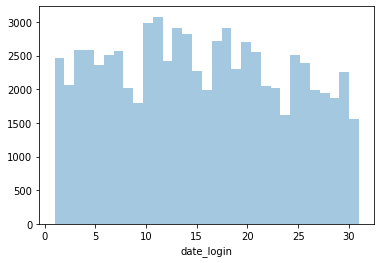

In [21]:
# remove na's
day_of_month_userdata = day_of_month_userdata.dropna()

# plot the day of the month
sns.distplot(day_of_month_userdata, kde=False, bins=31)

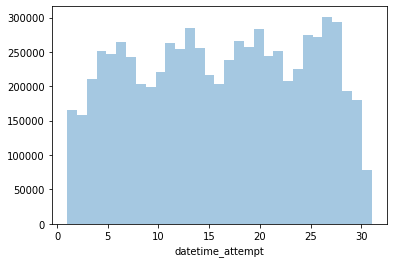

In [24]:
# remove na's
day_of_month_problem = day_of_month_problem.dropna()

# plot the day of the month
sns.distplot(day_of_month_problem, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me.

## Exporting Data

In [ ]:
info_content_df.to_csv('../data/interim/Transformed_Info_Content.csv')
info_userdata_transformed_df.to_csv('../data/interim/Transformed_Info_UserData.csv')
log_problem_transformed_df.to_csv('../data/interim/Transformed_Log_Problem.csv')